<a href="https://colab.research.google.com/github/kitty57/kaggle_competitions/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# Load the datasets into Pandas DataFrames
train_data = pd.read_csv('/content/drive/MyDrive/House Price Prediction /train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/House Price Prediction /test.csv')
sample_submission_data = pd.read_csv('/content/drive/MyDrive/House Price Prediction /sample_submission (1).csv')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Handling missing values in the training data
train_data.fillna(train_data.mean(), inplace=True)  # Fill numerical missing values with mean

<ipython-input-4-5f349b4e24ed>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.fillna(train_data.mean(), inplace=True)  # Fill numerical missing values with mean


In [ ]:
# Handling missing values in the training data for categorical columns
for column in ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']:
    train_data[column].fillna('Unknown', inplace=True)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
sample_submission_data.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [ ]:
sample_submission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [ ]:
# Handling missing values in the test data
test_data.fillna(test_data.mean(), inplace=True)  # Fill numerical missing values with mean

<ipython-input-9-c7e41e45f522>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_data.fillna(test_data.mean(), inplace=True)  # Fill numerical missing values with mean


In [ ]:
# Handling missing values in the test data for categorical columns
for column in ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']:
    test_data[column].fillna('Unknown', inplace=True)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
train_data.tail(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1360,1361,70,RL,51.000000,9842,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,5,2008,WD,Normal,189000
1361,1362,20,RL,124.000000,16158,Pave,Unknown,IR1,Low,AllPub,...,0,Unknown,Unknown,Unknown,0,6,2009,WD,Normal,260000
1362,1363,50,RL,70.049958,12513,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,6,2009,WD,Normal,104900
1363,1364,60,RL,73.000000,8499,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,3,2007,New,Partial,156932
1364,1365,160,FV,30.000000,3180,Pave,Pave,Reg,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,4,2006,WD,Abnorml,144152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.000000,7917,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.000000,13175,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,MnPrv,Unknown,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.000000,9042,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.000000,9717,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,4,2010,WD,Normal,142125


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_columns_1 = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

# Initialize LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical column
for column in categorical_columns_1:
    label_encoders[column] = LabelEncoder()
    train_data[column] = label_encoders[column].fit_transform(train_data[column])

In [ ]:
train_data.tail(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1410,1411,60,3,79.000000,12420,1,2,3,3,0,...,0,3,4,4,0,6,2009,8,4,230000
1411,1412,50,3,80.000000,9600,1,2,3,3,0,...,0,3,2,4,0,9,2009,8,4,140000
1412,1413,90,3,60.000000,7200,1,2,3,3,0,...,0,3,4,4,0,6,2009,8,4,90000
1413,1414,20,3,88.000000,10994,1,2,0,3,0,...,0,3,4,4,0,9,2009,0,0,257000
1414,1415,50,3,64.000000,13053,1,1,3,0,0,...,0,3,4,4,0,6,2008,8,4,207000
1415,1416,120,3,51.000000,3635,1,2,3,3,0,...,0,3,4,4,0,5,2009,8,4,175900
1416,1417,190,4,60.000000,11340,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,122500
1417,1418,60,3,70.049958,16545,1,2,0,3,0,...,0,3,4,4,0,5,2009,8,4,340000
1418,1419,20,3,71.000000,9204,1,2,3,3,0,...,0,3,4,4,0,8,2008,0,4,124000
1419,1420,20,3,70.049958,16381,1,2,0,3,0,...,0,3,4,4,0,12,2006,8,4,223000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_columns_2 = ['MSZoning','Street','Alley','LotShape','LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
# Initialize LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical column
for column in categorical_columns_2:
    label_encoders[column] = LabelEncoder()
    test_data[column] = label_encoders[column].fit_transform(test_data[column])

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int64  
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int64  
 6   Alley          1459 non-null   int64  
 7   LotShape       1459 non-null   int64  
 8   LandContour    1459 non-null   int64  
 9   Utilities      1459 non-null   int64  
 10  LotConfig      1459 non-null   int64  
 11  LandSlope      1459 non-null   int64  
 12  Neighborhood   1459 non-null   int64  
 13  Condition1     1459 non-null   int64  
 14  Condition2     1459 non-null   int64  
 15  BldgType       1459 non-null   int64  
 16  HouseStyle     1459 non-null   int64  
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,2,3,3,0,...,120,0,2,2,3,0,6,2010,9,4
1,1462,20,3,81.0,14267,1,2,0,3,0,...,0,0,2,4,0,12500,6,2010,9,4
2,1463,60,3,74.0,13830,1,2,0,3,0,...,0,0,2,2,3,0,3,2010,9,4
3,1464,60,3,78.0,9978,1,2,0,3,0,...,0,0,2,4,3,0,6,2010,9,4
4,1465,120,3,43.0,5005,1,2,0,1,0,...,144,0,2,4,3,0,1,2010,9,4


#Numerical features for train data

In [ ]:
numerical_features_1 = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
                      'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                      'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                      'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                      'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                      'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                      'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
                      'MoSold', 'YrSold']

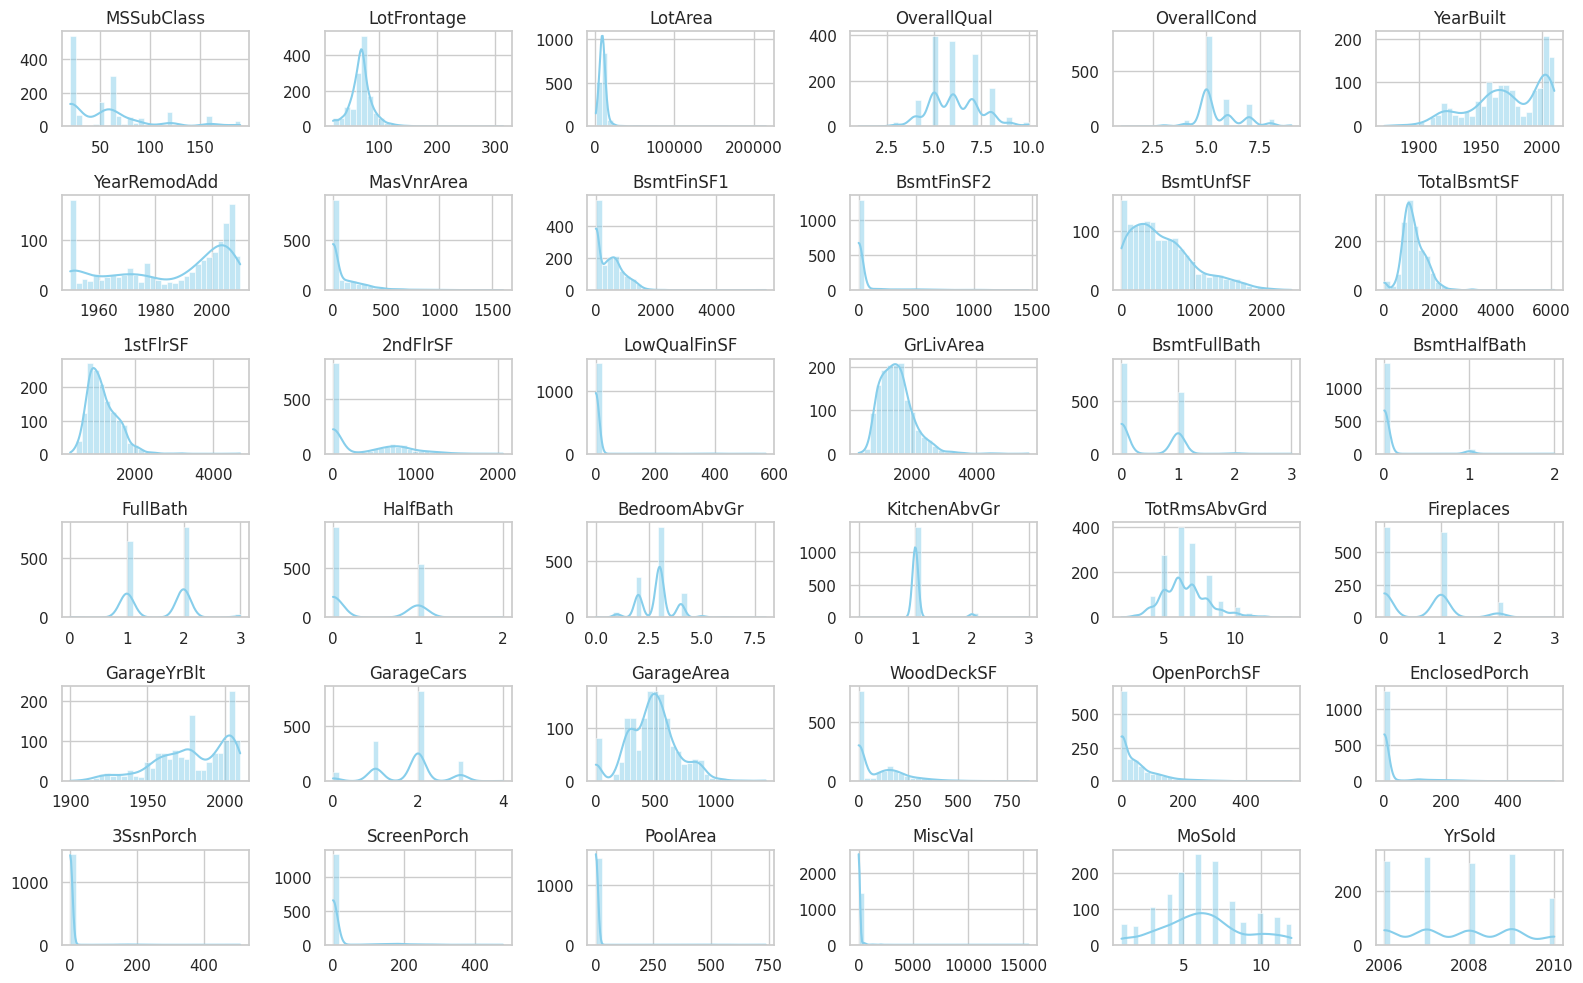

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn plots
sns.set(style="whitegrid")

# Visualize numerical features using histograms, box plots, and violin plots
plt.figure(figsize=(16, 10))
for i, feature in enumerate(numerical_features_1, start=1):
    plt.subplot(6, 6, i)
    sns.histplot(train_data[feature], kde=True, color='skyblue', bins=30)
    plt.title(feature, fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

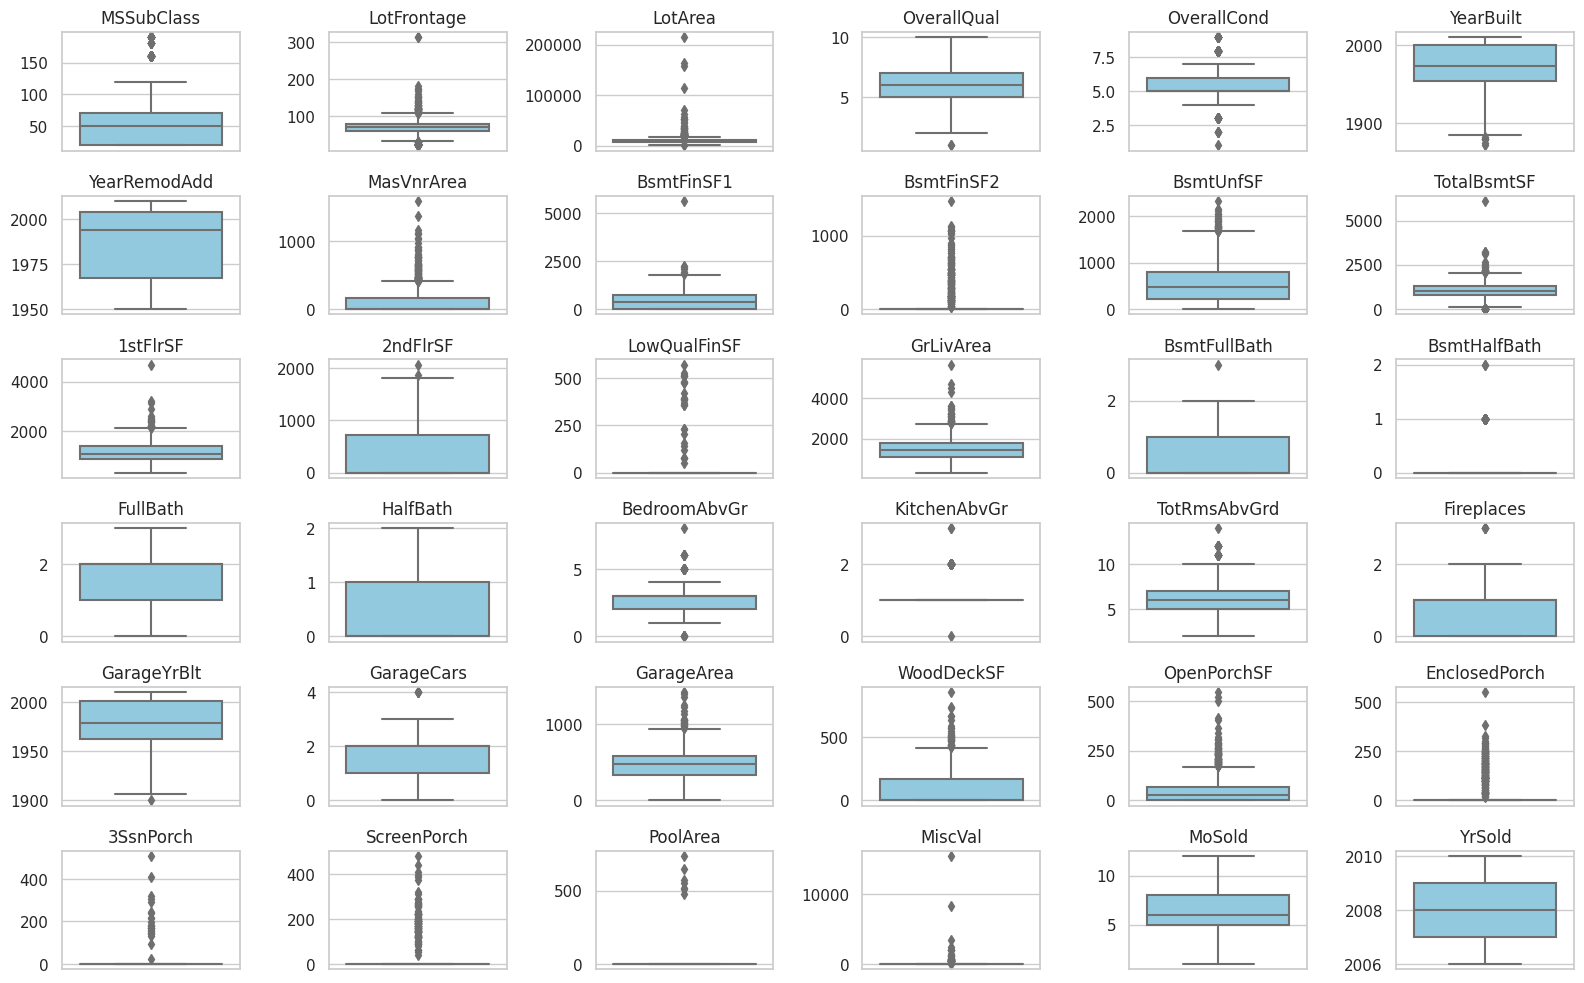

In [ ]:
plt.figure(figsize=(16, 10))
for i, feature in enumerate(numerical_features_1, start=1):
    plt.subplot(6, 6, i)
    sns.boxplot(y=train_data[feature], color='skyblue')
    plt.title(feature, fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

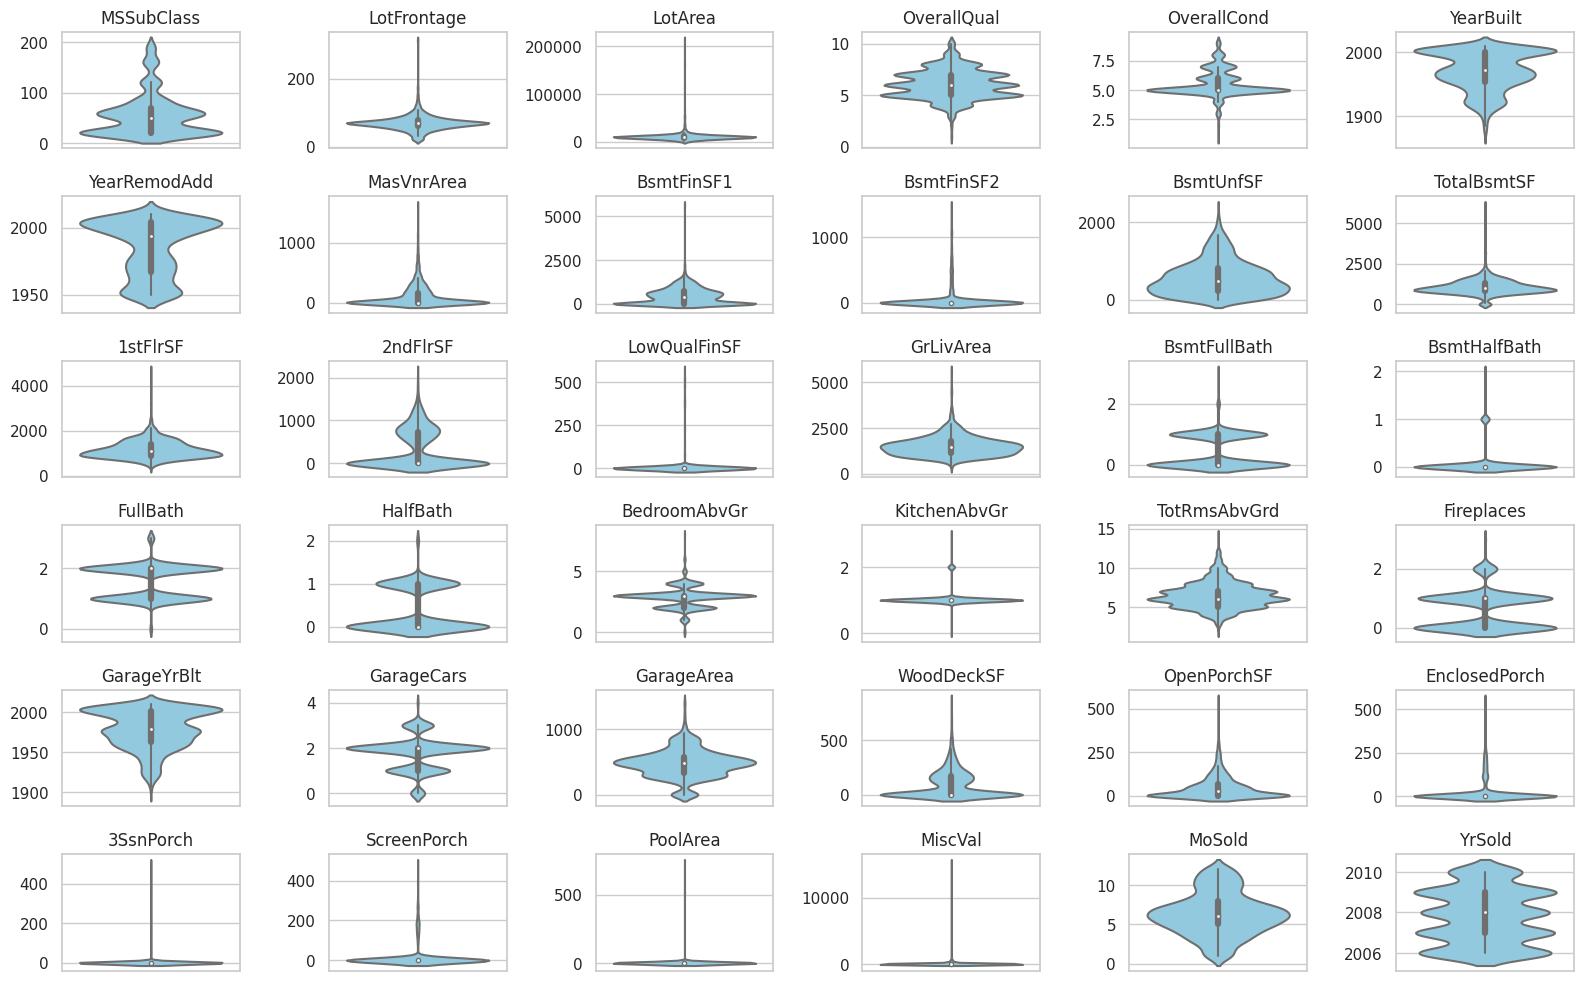

In [ ]:
plt.figure(figsize=(16, 10))
for i, feature in enumerate(numerical_features_1, start=1):
    plt.subplot(6, 6, i)
    sns.violinplot(y=train_data[feature], color='skyblue')
    plt.title(feature, fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
categorical_features_1 =['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

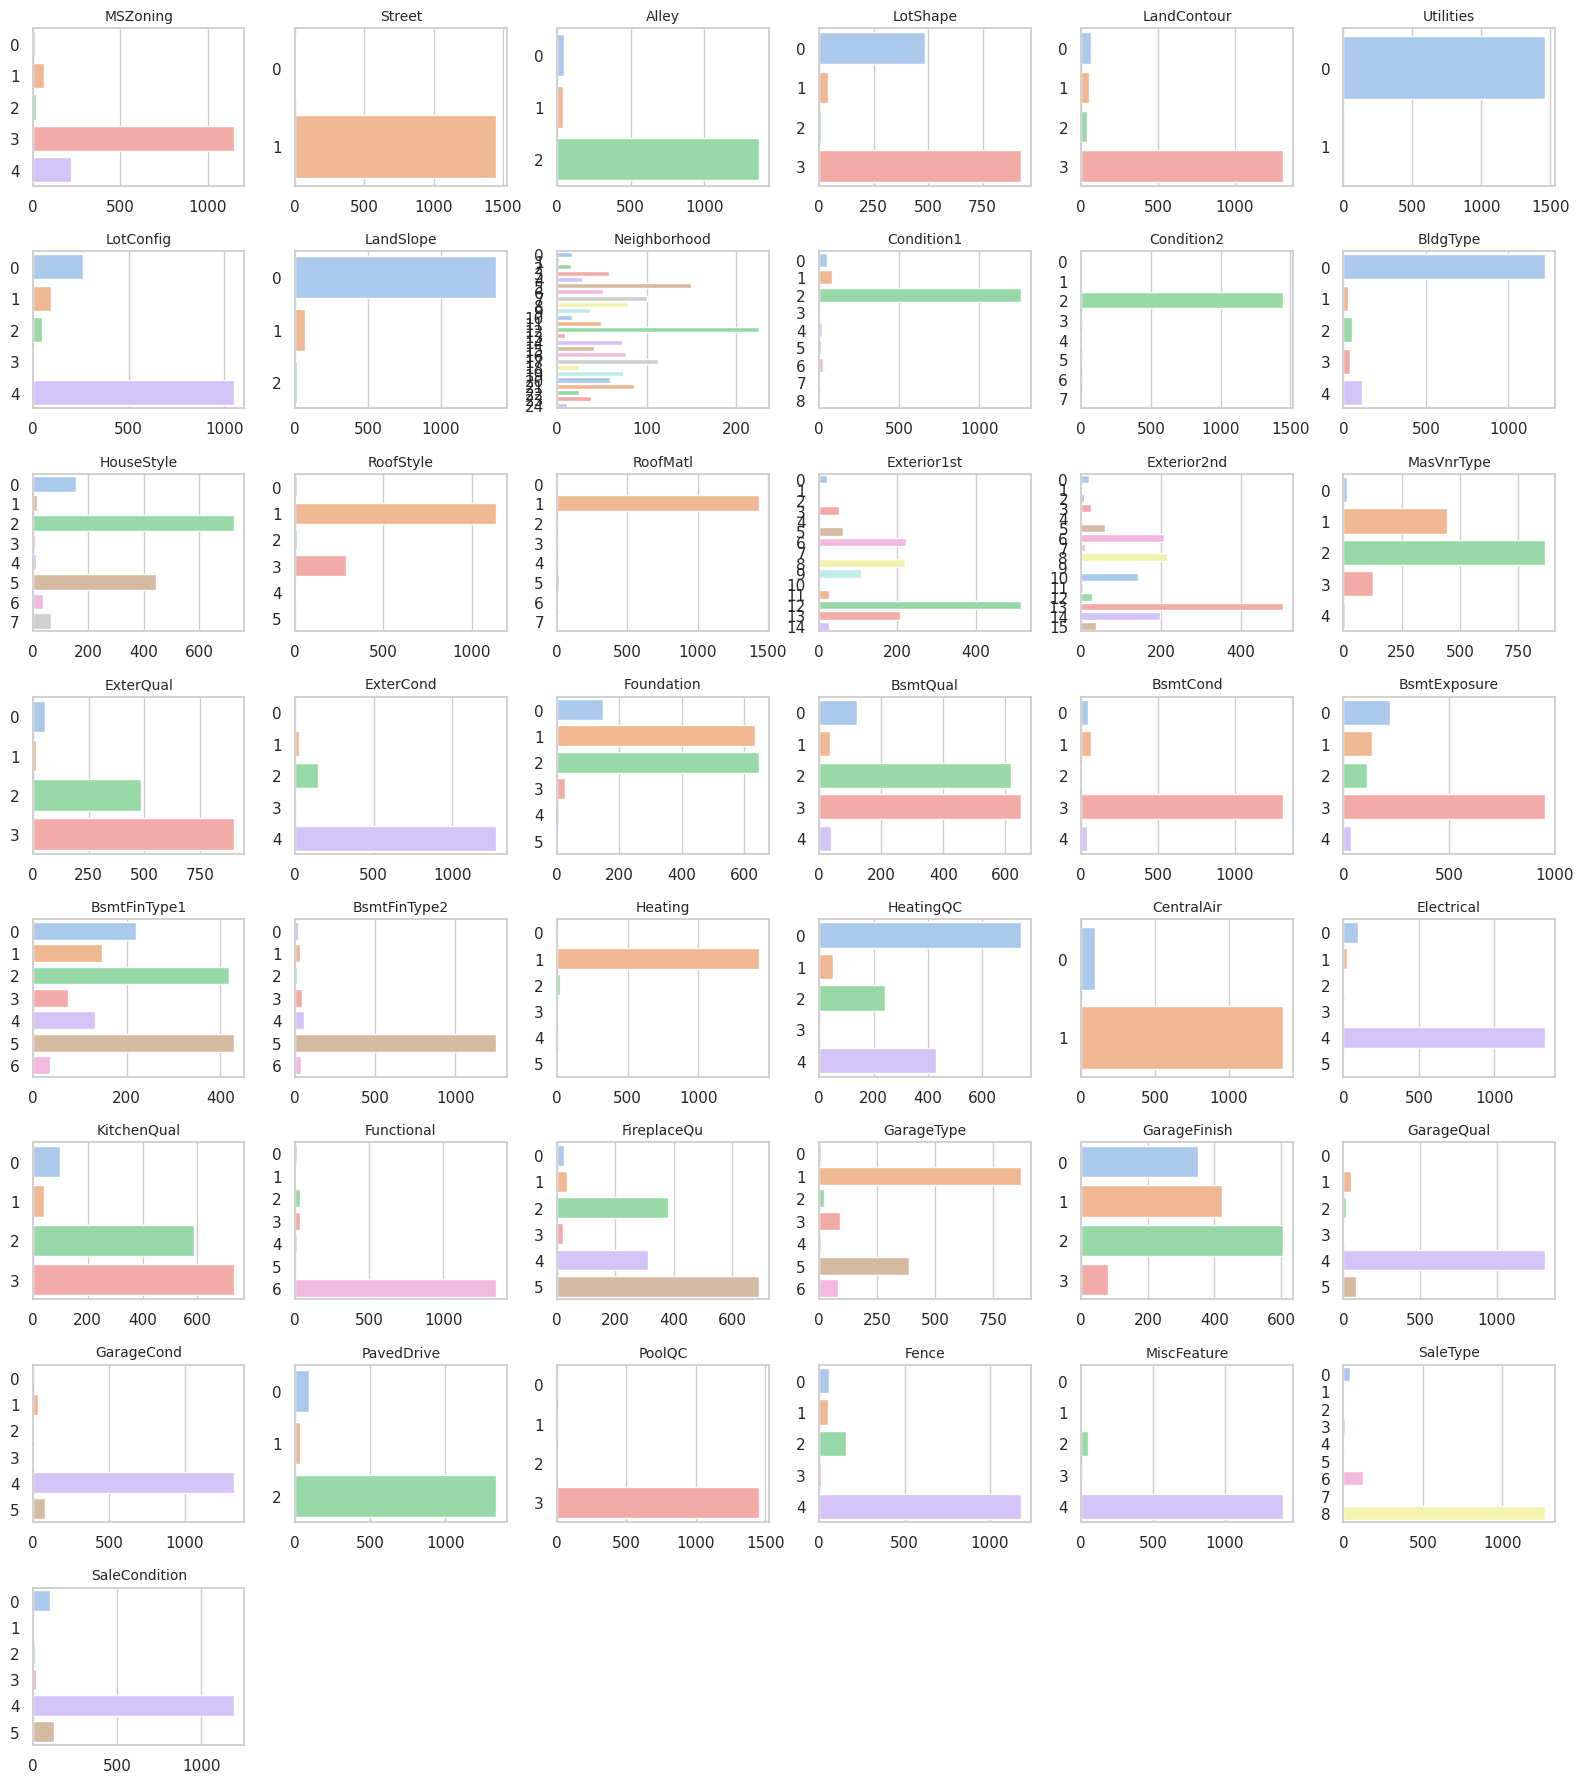

In [ ]:
# Visualize categorical features using bar charts
plt.figure(figsize=(16, 18))
for i, feature in enumerate(categorical_features_1, start=1):
    plt.subplot(8, 6, i)
    sns.countplot(y=train_data[feature], palette='pastel')
    plt.title(feature, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Assume you have features stored in X and the target variable in y

# Split the data into features (X) and target variable (y)
X = train_data.drop(columns=['SalePrice'])  # Features
y = train_data['SalePrice']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert your training data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train.values)
y_train_tensor = torch.Tensor(y_train.values)

# Create a DataLoader for efficient batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
batch_size = 64  # Choose an appropriate batch size
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [ ]:

class SimpleNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

In [ ]:
# Define input, hidden, and output sizes
input_size = len(X_train.columns)  # Number of input features
hidden_size1 = 128  # Number of neurons in the first hidden layer
hidden_size2 = 64  # Number of neurons in the second hidden layer
output_size = 1  # Since it's regression, output size is 1

# Initialize the model
model = SimpleNeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss for regression problems
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001


# Initialize a list to store training loss values
train_losses = []

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)  # Assuming X_train_tensor is the tensor version of your training data
    loss = criterion(outputs, y_train_tensor.view(-1, 1))  # Compute the loss

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store the training loss
    train_losses.append(loss.item())

    # Print training loss for each epoch (optional)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/100], Loss: 38931279872.0000
Epoch [2/100], Loss: 38892302336.0000
Epoch [3/100], Loss: 38854901760.0000
Epoch [4/100], Loss: 38817415168.0000
Epoch [5/100], Loss: 38780149760.0000
Epoch [6/100], Loss: 38742859776.0000
Epoch [7/100], Loss: 38704427008.0000
Epoch [8/100], Loss: 38664331264.0000
Epoch [9/100], Loss: 38622507008.0000
Epoch [10/100], Loss: 38578929664.0000
Epoch [11/100], Loss: 38532771840.0000
Epoch [12/100], Loss: 38483574784.0000
Epoch [13/100], Loss: 38431330304.0000
Epoch [14/100], Loss: 38375075840.0000
Epoch [15/100], Loss: 38314381312.0000
Epoch [16/100], Loss: 38248804352.0000
Epoch [17/100], Loss: 38178140160.0000
Epoch [18/100], Loss: 38102179840.0000
Epoch [19/100], Loss: 38020624384.0000
Epoch [20/100], Loss: 37933101056.0000
Epoch [21/100], Loss: 37839298560.0000
Epoch [22/100], Loss: 37738758144.0000
Epoch [23/100], Loss: 37630988288.0000
Epoch [24/100], Loss: 37515534336.0000
Epoch [25/100], Loss: 37391876096.0000
Epoch [26/100], Loss: 37259501568.

In [ ]:
torch.save(model.state_dict(), 'trained_model.pth')

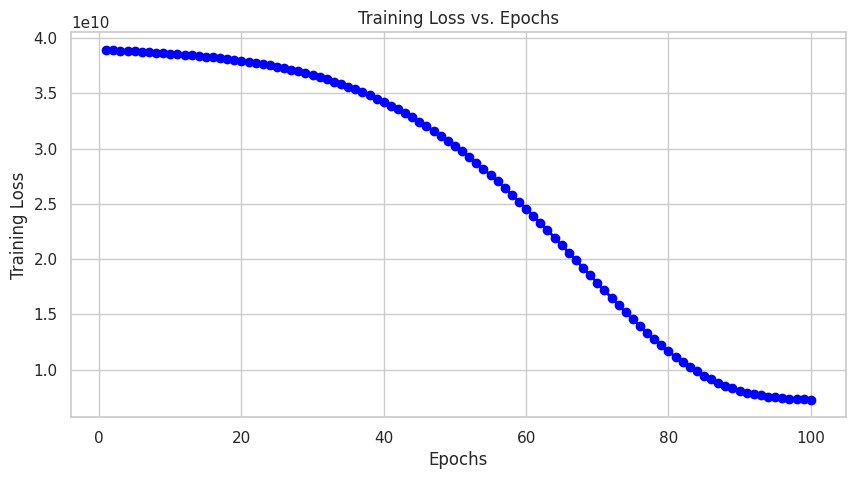

In [ ]:

import matplotlib.pyplot as plt
# Plotting the training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Epochs')
plt.grid(True)
plt.show()

In [ ]:

# Get the first batch of data from the DataLoader
for inputs, targets in train_loader:
    break

# Forward pass to get activations and gradients
outputs = model(inputs)
loss = criterion(outputs, targets)
loss.backward()

# Visualize gradients
gradients = []
for param in model.parameters():
    if param.grad is not None:
        gradients.append(param.grad.view(-1))
gradients = torch.cat(gradients)

# Visualize activations (output of each layer)
activation_values = []
for layer in model.children():
    inputs = layer(inputs)
    activation_values.append(inputs.view(inputs.size(0), -1))
activation_values = torch.cat(activation_values, dim=1)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


<ipython-input-36-febb48bb9a43>:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mappable, ticks=np.linspace(gradients.min(), gradients.max(), 10))


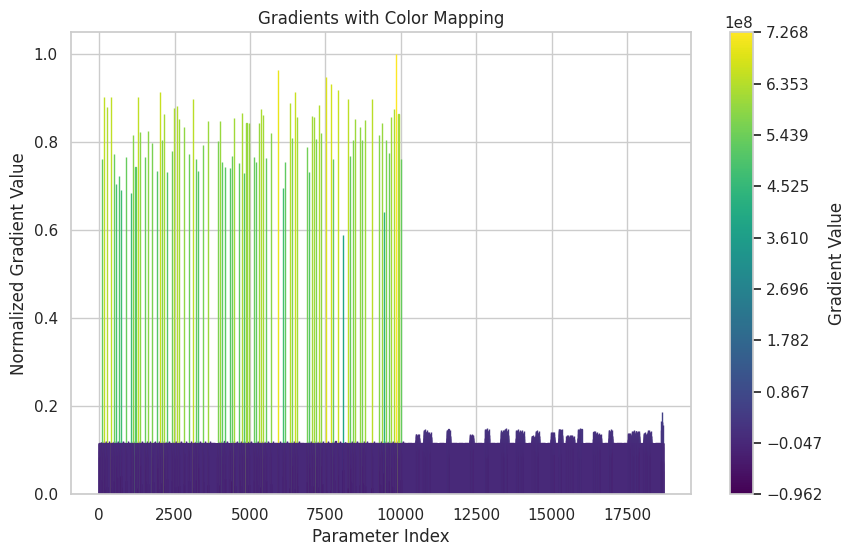

In [ ]:
import numpy as np

# Normalize gradients to range [0, 1]
normalized_gradients = (gradients - gradients.min()) / (gradients.max() - gradients.min())

# Define a color map
colormap = plt.cm.viridis

plt.figure(figsize=(10, 6))
plt.title('Gradients with Color Mapping')
bars = plt.bar(range(len(normalized_gradients)), normalized_gradients.detach().numpy(), color=colormap(normalized_gradients.detach().numpy()))

# Add color bar to the right of the plot
mappable = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=gradients.min(), vmax=gradients.max()), cmap=colormap)
mappable.set_array([])
cbar = plt.colorbar(mappable, ticks=np.linspace(gradients.min(), gradients.max(), 10))
cbar.set_label('Gradient Value')

# Set color intensity based on gradient values
for bar, gradient_value in zip(bars, normalized_gradients.detach().numpy()):
    bar.set_color(colormap(gradient_value))

plt.xlabel('Parameter Index')
plt.ylabel('Normalized Gradient Value')
plt.show()

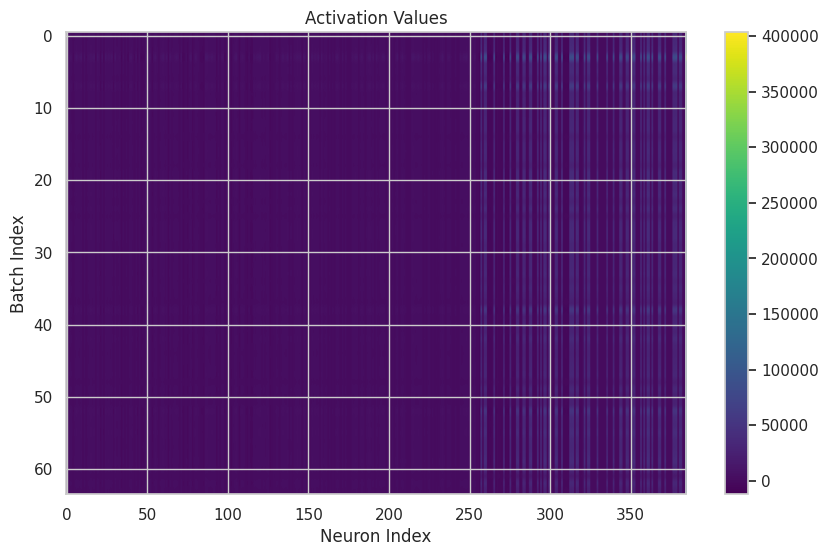

In [ ]:
# Visualize activation values
plt.figure(figsize=(10, 6))
plt.title('Activation Values')
plt.imshow(activation_values.detach().numpy(), aspect='auto', cmap='viridis')
plt.colorbar()
plt.xlabel('Neuron Index')
plt.ylabel('Batch Index')
plt.show()

In [ ]:
# Load the trained model
model = SimpleNeuralNetwork(input_size, hidden_size1, hidden_size2, output_size) # Re-initialize your model
model.load_state_dict(torch.load('trained_model.pth'))  # Load the trained weights

# Set the model to evaluation mode
model.eval()

# Convert test_data to PyTorch tensor
test_data_tensor = torch.Tensor(test_data.values)

# Make predictions using the test data
with torch.no_grad():
    predictions_tensor = model(test_data_tensor)  # Forward pass

# Convert predictions tensor to NumPy array
predictions = predictions_tensor.numpy()

# 'predictions' now contains the predicted values for the test data

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming 'SalePrice' column contains actual target values in the sample_submission.csv file
actual_values = sample_submission_data['SalePrice'].values

# Calculate RMSE
rmse = sqrt(mean_squared_error(actual_values, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Root Mean Squared Error (RMSE): 30594.20


In [ ]:
# Calculate mean of actual values
mean_actual_values = actual_values.mean()

# Calculate Percentage RMSE
percentage_rmse = (rmse / mean_actual_values) * 100
print("Percentage RMSE:", percentage_rmse)

Percentage RMSE: 17.07418961849874


2. Visualize Predicted vs. Actual Values using Scatter Plot

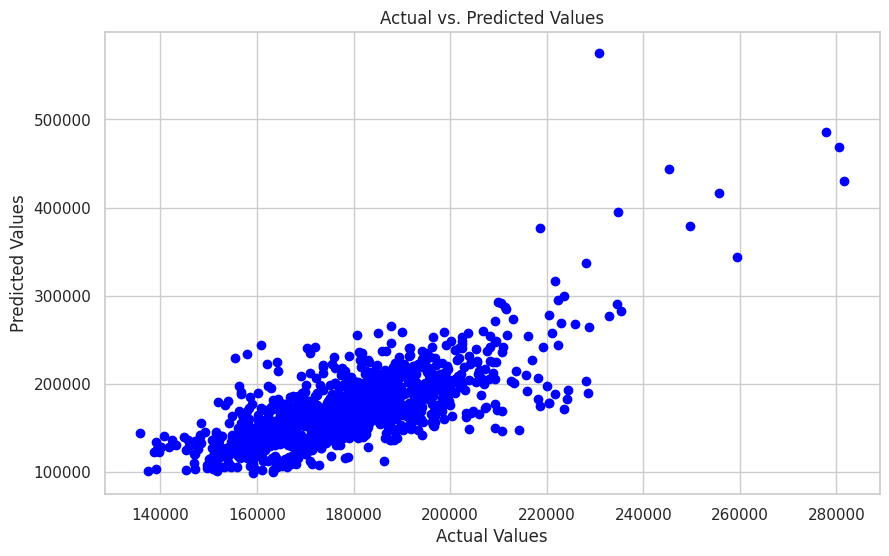

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predictions, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

3.Create Residual Plots

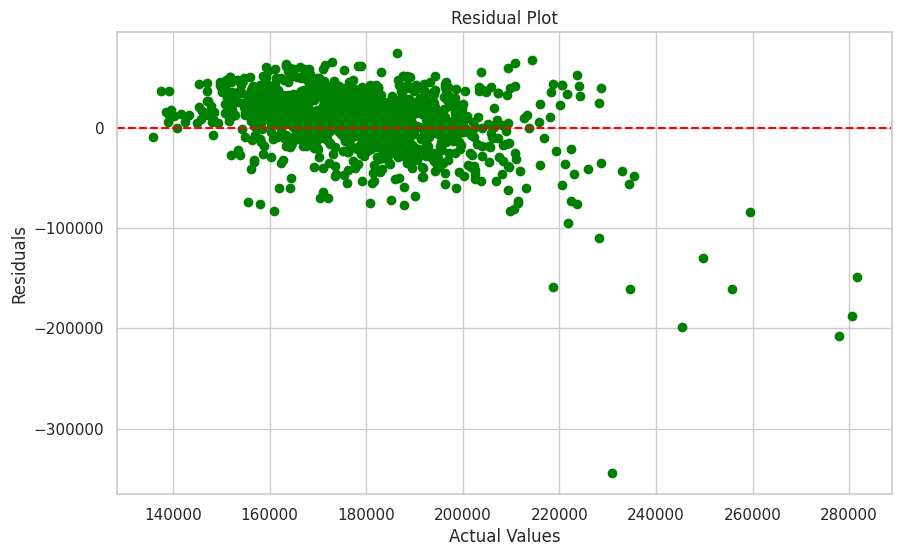

In [ ]:
# Calculate residuals
residuals = actual_values - predictions.reshape(-1)

plt.figure(figsize=(10, 6))
plt.scatter(actual_values, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error
from math import sqrt
import random

# Convert your training data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train.values)
y_train_tensor = torch.Tensor(y_train.values)

# Define the search space for hyperparameters
search_space = {
    'hidden_size1': [64, 128, 256],
    'hidden_size2': [32, 64, 128],
    'lr': [0.001, 0.01, 0.1]
}

# Initialize variables for best hyperparameters and RMSE
best_params = None
best_rmse = float('inf')

# Perform random search for hyperparameter tuning
num_iterations = 20  # Number of random combinations to try
for _ in range(num_iterations):
    # Randomly sample hyperparameters from the search space
    params = {
        'hidden_size1': random.choice(search_space['hidden_size1']),
        'hidden_size2': random.choice(search_space['hidden_size2']),
        'lr': random.choice(search_space['lr'])
    }

    # Create the model
    model = SimpleNeuralNetwork(input_size, params['hidden_size1'], params['hidden_size2'], output_size)

    # Define the optimizer and criterion
    optimizer = optim.Adam(model.parameters(), lr=params['lr'])
    criterion = nn.MSELoss()

    # Training loop
    num_epochs = 100
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor.view(-1, 1))

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate RMSE
    with torch.no_grad():
        predictions = model(test_data_tensor).numpy()
    rmse = sqrt(mean_squared_error(actual_values, predictions))

    # Check if this set of hyperparameters gives a better RMSE
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params

# Print the best hyperparameters and corresponding RMSE
print("Best Hyperparameters: ", best_params)
print(f'Best Root Mean Squared Error (RMSE): {best_rmse:.2f}')

Best Hyperparameters:  {'hidden_size1': 256, 'hidden_size2': 64, 'lr': 0.001}
Best Root Mean Squared Error (RMSE): 25596.98


In [ ]:
torch.save(model.state_dict(), 'model.pth')

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class YourFinalModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(YourFinalModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
input_size = len(X_train.columns)
hidden_size1 = 256  # Best hidden size from hyperparameter tuning
hidden_size2 = 128  # Best hidden size from hyperparameter tuning
output_size = 1  # Regression task has single output
learning_rate = 0.001  # Best learning rate from hyperparameter tuning

final_model = YourFinalModel(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(final_model.parameters(), lr=learning_rate)

In [ ]:
num_epochs = 100  # Choose the number of epochs based on your preference

for epoch in range(num_epochs):
    for batch_inputs, batch_targets in train_loader:
        optimizer.zero_grad()
        outputs = final_model(batch_inputs)
        loss = criterion(outputs, batch_targets.view(-1, 1))
        loss.backward()
        optimizer.step()

    # Print training loss for each epoch (optional)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/100], Loss: 28706312192.0000
Epoch [2/100], Loss: 45703249920.0000
Epoch [3/100], Loss: 18079711232.0000
Epoch [4/100], Loss: 5404805120.0000
Epoch [5/100], Loss: 4636626432.0000
Epoch [6/100], Loss: 2466770944.0000
Epoch [7/100], Loss: 2794767616.0000
Epoch [8/100], Loss: 1221522048.0000
Epoch [9/100], Loss: 14420377600.0000
Epoch [10/100], Loss: 2364159488.0000
Epoch [11/100], Loss: 7878971392.0000
Epoch [12/100], Loss: 1760692608.0000
Epoch [13/100], Loss: 4117122816.0000
Epoch [14/100], Loss: 3399420928.0000
Epoch [15/100], Loss: 1452523520.0000
Epoch [16/100], Loss: 11377917952.0000
Epoch [17/100], Loss: 8638871552.0000
Epoch [18/100], Loss: 5006078976.0000
Epoch [19/100], Loss: 2318642688.0000
Epoch [20/100], Loss: 2150237184.0000
Epoch [21/100], Loss: 1536608256.0000
Epoch [22/100], Loss: 1906663936.0000
Epoch [23/100], Loss: 4227464704.0000
Epoch [24/100], Loss: 1962583552.0000
Epoch [25/100], Loss: 1493262336.0000
Epoch [26/100], Loss: 276425472.0000
Epoch [27/100], L

In [ ]:
final_model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = final_model(test_data_tensor).numpy()

In [ ]:
import pandas as pd

submission_df = pd.DataFrame({
    'Id': test_data['Id'],  # Assuming 'Id' column is in your test_data DataFrame
    'SalePrice': predictions.reshape(-1)
})

submission_df.head()

,Id,SalePrice
0,1461,145630.734375
1,1462,169800.703125
2,1463,179636.359375
3,1464,185388.140625
4,1465,164120.203125


In [ ]:
# Save the submission file to a CSV
submission_df.to_csv('House_price_submission.csv', index=False)